In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Euler's method: y_(n+1) = y_n + hf(x_n, y_n)
# ---- Plot step size 'h' and error on X and Y axes, and check if reducing 'h' reduces the error

class ODE:
    def __init__(self, x0, x_end, y0):
        self.x0 = x0
        self.x_end = x_end
        self.y0 = y0

    def f_ode(self, x_point, y_point):
        # return (x_point + y_point)  # Test euler
        # return (y_point + np.cos(x_point))  # Test modified euler
        return x_point * y_point + pow(x_point, 3)  # Test RK4

    # Analytical Solution
    def f_actual(self, x_point):
        # return (2 * np.exp(x_point) - x_point - 1)  # Test euler
        # return ((3.0 / 2.0) * np.exp(x_point)) + ((1.0 / 2.0) * (np.sin(x_point) - np.cos(x_point)))  # Test modified euler
        return (self.y0 + self.x0 ** 2 + 2) * np.exp((x_point ** 2 - self.x0 ** 2) / 2) - (x_point ** 2) - 2

    # -------------------------------------------------------

    # Euler's Method
    def eulers_method(self, h):
        n = int((self.x_end - self.x0) / h)
        x = np.linspace(self.x0, self.x_end, n + 1)  # Generating equal spaced x values
        y = np.zeros(n + 1)
        y[0] = self.y0

        for i in range(n):
            y[i + 1] = y[i] + h * self.f_ode(x[i], y[i])

        return x, y

    # -------------------------------------------------------

    # Modified Euler Method
    def modified_euler_method(self, h):
        x = np.arange(self.x0, self.x_end + 1e-12, h)
        n = len(x) - 1
        y = np.zeros(n + 1)
        y[0] = self.y0

        for i in range(n):
            y_pred = y[i] + h * self.f_ode(x[i], y[i])  # Predictor
            y[i + 1] = y[i] + (h / 2.0) * (self.f_ode(x[i], y[i]) + self.f_ode(x[i + 1], y_pred)) # Corrector

        # print(x, y)
        return x, y

    # -------------------------------------------------------

    def rk4(self, h):
        x = np.arange(self.x0, self.x_end + 1e-12, h)
        n = len(x) - 1
        y = np.zeros(n + 1)
        y[0] = self.y0
        h_half = h / 2.0

        for i in range(n):
            k1 = self.f_ode(x[i], y[i])
            k2 = self.f_ode(x[i] + h_half, y[i] + h_half * k1)
            k3 = self.f_ode(x[i] + h_half, y[i] + h_half * k2)
            k4 = self.f_ode(x[i] + h, y[i] + h * k3)
            y[i + 1] = y[i] + (h / 6.0) * (k1 + (2 * k2) + (2 * k3) + k4)

        # print(x, y)
        return x, y
    
    # -------------------------------------------------------

    def compare_error(self, method = "Eulers"):
        h_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
        errors = []

        for h in h_values:
            if method == "Eulers":
                x, y = self.eulers_method(h)
            elif method == "Modified_Eulers":
                x, y = self.modified_euler_method(h)
            elif method == "RK4":
                x, y = self.rk4(h)
            else:
                print("Please enter a valid method.")
                return
            actual_error = self.f_actual(self.x_end)  
            err = abs(y[-1] - actual_error)  # Considering the absolute error of the last value
            errors.append(err)

        plt.loglog(h_values, errors, marker = 'o')
        plt.title("Error vs Step Size (Euler's Method)")
        plt.xlabel("Step size (h)")
        plt.ylabel(f"Absolute error at x = {self.x_end}")
        plt.show()

        for h_val, err in zip(h_values, errors):
            print(f"h = {h_val:.5f}, Error = {err:.8f}")

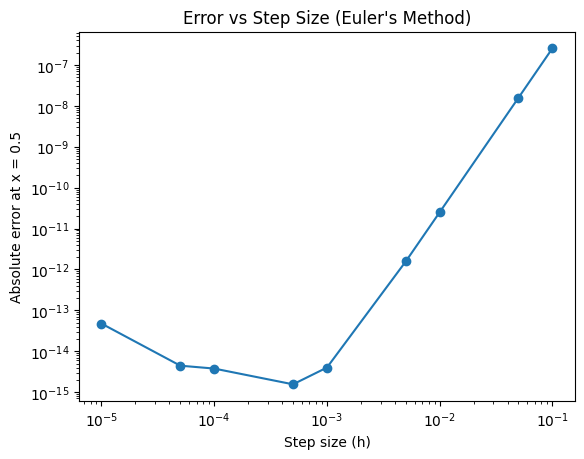

h = 0.10000, Error = 0.00000026
h = 0.05000, Error = 0.00000002
h = 0.01000, Error = 0.00000000
h = 0.00500, Error = 0.00000000
h = 0.00100, Error = 0.00000000
h = 0.00050, Error = 0.00000000
h = 0.00010, Error = 0.00000000
h = 0.00005, Error = 0.00000000
h = 0.00001, Error = 0.00000000


NameError: name 'solve_ivp' is not defined

In [88]:
ode_obj = ODE(0.0, 0.5, 1)
# ode_obj.compare_error("Eulers")

# ode_obj.modified_euler_method(0.2)
# ode_obj.compare_error("Modified_Eulers")

ode_obj.rk4(0.25)
ode_obj.compare_error("RK4")

[0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 9.68385488e-02 1.82577098e-01 2.73328215e-01 3.64017789e-01
 4.54384634e-01 5.00000000e-01]
[1.         1.         1.00000061 1.00006161 1.00472188 1.01708622
 1.03947346 1.07298682 1.11978275 1.14944536]


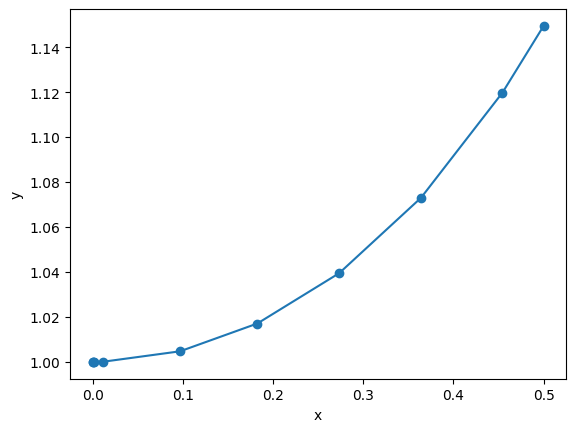

In [91]:
from scipy.integrate import solve_ivp

sol = solve_ivp(ode_obj.f_ode, [0, 0.5], [1], method='RK45', rtol=1e-9, atol=1e-12)
print(sol.t)     # x (time) values
print(sol.y[0])  # y values corresponding to sol.t

plt.plot(sol.t, sol.y[0], 'o-')
plt.xlabel("x")
plt.ylabel("y")
plt.show()